# Lecture 2: Exploratory Data Analysis

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2018 Winter Term 1

By Mike Gelbart (converted to Julia by Jason Chau)

In [2]:
using Printf
#= run once
    using Pkg
    Pkg.add("PyCall")
    Pkg.add("Conda")
    using Conda
    Conda.add("seaborn")
    Pkg.add("FileIO")
    Pkg.add("Pandas")
    Pkg.add("ImageMagick")
    Pkg.add("ImageView")
    Pkg.add("Images")
    Pkg.build("ImageMagick")
=#
using PyCall
SkText = pyimport("sklearn.feature_extraction.text")
using Pandas
using FileIO, Images, ImageView
sns = pyimport("seaborn")

PyObject <module 'seaborn' from 'C:\\Users\\jasonsyc.STUDENTS.000\\.julia\\conda\\3\\lib\\site-packages\\seaborn\\__init__.py'>

## Typical steps of ML

1. Identify question / task
2. Collect data
3. Clean and preprocess data
4. Exploratory data anlysis
5. Feature and model selection
6. Train model
7. Evaluate and communicate results
8. Deploy working system

(but not necessarily in this order...)

Today we'll discuss steps (3) and (4)

## What does data look like?

Often, it is tabular (but certainly not always!).

In [32]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- Each row is an **example**.
- Each column is a **feature**.

## Types of features

- Categorical (e.g. `survived`, `embark_town`)
- Numerical (e.g. age, fare)
- Some are more ambiguous, like `pclass`: is this categorical or numerical?

Many of our methods are meant to work with numerical features. We can convert categorical to numerical.

In [6]:
PyObject(get_dummies(titanic, columns=["embarked"])).head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,0,1


If we do this for all our features, we can now interpret objects as points in space.

In [7]:
titanic_num = PyObject(get_dummies(titanic, columns=["sex","embarked","fare","class","who","adult_male","deck","embark_town","alive","alone"]))
titanic_num.shape

(891, 280)

- So we now have 891 objects and 280 features. 
- In other words, each object is a point in 280-dimensional space.
- This is why multivariable calculus is a prerequisite for CPSC 340.

### Other feature types: text data 

In [7]:
text = "The University of British Columbia (UBC) is a public research university with campuses and facilities in British Columbia, Canada."

"The University of British Columbia (UBC) is a public research university with campuses and facilities in British Columbia, Canada."

One approach: **bag of words** features. 

In [8]:
cv = SkText.CountVectorizer()
feat = cv.fit_transform([text])

PyObject <1x15 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [34]:
for (k,v) in cv.vocabulary_
   Printf.@printf("%-14s%d\n",k,convert(Int64,v))
end

public        9
is            7
and           0
university    13
in            6
facilities    5
research      10
british       1
the           11
campuses      2
with          14
canada        3
of            8
ubc           12
columbia      4


In [30]:
cv.vocabulary_

Dict{Any,Any} with 15 entries:
  "public"     => PyObject 9
  "is"         => PyObject 7
  "and"        => PyObject 0
  "university" => PyObject 13
  "in"         => PyObject 6
  "facilities" => PyObject 5
  "research"   => PyObject 10
  "british"    => PyObject 1
  "the"        => PyObject 11
  "campuses"   => PyObject 2
  "with"       => PyObject 14
  "canada"     => PyObject 3
  "of"         => PyObject 8
  "ubc"        => PyObject 12
  "columbia"   => PyObject 4

- Bag of words ignores the order of words but still can work well.
- You can interpret each document as a point in space, compute distances.

### Other feature types: images

In [1]:
img = load("./img/Irving_K._Barber_Library.jpg")
imshow(img);

  Updating registry at `C:\Users\jasonsyc.STUDENTS.000\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed WinRPM ─────────── v0.4.2
 Installed RoundingIntegers ─ v0.2.0
 Installed Reactive ───────── v0.8.3
 Installed BufferedStreams ── v1.0.0
 Installed Homebrew ───────── v0.7.1
 Installed LibExpat ───────── v0.5.0
 Installed ImageView ──────── v0.9.0
 Installed Cairo ──────────── v0.6.0
 Installed HTTPClient ─────── v0.2.1
 Installed LibCURL ────────── v0.5.2
 Installed Libz ───────────── v1.0.0
 Installed GtkReactive ────── v0.6.0
 Installed Gtk ────────────── v0.17.0
  Updating `C:\Users\jasonsyc.STUDENTS.000\.julia\environments\v0.7\Project.toml`
  [86fae568] + ImageView v0.9.0
  Updating `C:\Users\jasonsyc.STUDENTS.000\.julia\environments\v0.7\Manifest.toml`
  [e1450e63] + BufferedStreams v1.0.0
  [159f3aea] + Cairo v0.6.0
  [4c0ca9eb] + Gtk v0.17.0
  [27996c0f] + GtkReactive v0.6.0
  [0862f596]

┌ Info: Precompiling ImageView [86fae568-95e7-573e-a6b2-d8a6b900c9ef]
└ @ Base loading.jl:1187
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1187
ERROR: LoadError: LoadError: ImageMagick not properly installed. Please run Pkg.build("ImageMagick") then restart Julia.
Stacktrace:
 [1] error(::String) at .\error.jl:33
 [2] top-level scope at C:\Users\jasonsyc.STUDENTS.000\.julia\packages\ImageMagick\d5KBL\src\libmagickwand.jl:25
 [3] include at .\boot.jl:317 [inlined]
 [4] include_relative(::Module, ::String) at .\loading.jl:1038
 [5] include at .\sysimg.jl:29 [inlined]
 [6] include(::String) at C:\Users\jasonsyc.STUDENTS.000\.julia\packages\ImageMagick\d5KBL\src\ImageMagick.jl:1
 [7] top-level scope at none:0
 [8] include at .\boot.jl:317 [inlined]
 [9] include_relative(::Module, ::String) at .\loading.jl:1038
 [10] include(::Module, ::String) at .\sysimg.jl:29
 [11] top-level scope at none:2
 [12] eval at .\boot.jl:319 [inlined]
 [13] eval(:

ErrorException: Failed to precompile ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1] to C:\Users\jasonsyc.STUDENTS.000\.julia\compiled\v0.7\ImageMagick\0LbNX.ji.

In [ ]:
img.shape

In [ ]:
img[1:3,1:3,:]

In [ ]:
size(img'[:])

- Now, again, the image is a point in space. 
- But now the space is 8,257,536-dimensional!
- We'll talk about this towards the end of the course.

## Data Cleaning

- ML+DM typically assume "clean" data.
- Ways that data might not be "clean":
  - Noise (e.g., distortion on phone)
  - Outliers (e.g., data entry or instrument error)
  - Missing values (no value available or not applicable)
  - Duplicated data (repetitions, or different storage formats)
  - Encodings (e.g., date-times in different formats)
  - Identity resolution (e.g., no reliable primary key across tables)
- Any of these can lead to problems in analyses.
  - Want to fix these issues, if possible.
  - Some ML methods are robust to these.
  - Often, ML is the best way to detect/fix these.


## How much data do we need?

- A difficult if not impossible question to answer.
- Usual answer: "more is better".
  - With the warning: "as long as the quality doesn’t suffer".
- Another popular answer: "ten times the number of features".
  - I don't like this view. Features are not the enemy!


## Feature aggregation

- Combine features to form new ones
- Useful if there are few examples of a particular case

In [7]:
titanic.deck.value_counts()

PyObject C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [36]:
titanic_agg = titanic.copy()

titanic_agg_df = DataFrame(titanic_agg)
titanic_agg_upper = DataFrame(Dict(:upper=>titanic_agg.deck.isin(("A","B")))) # not shown: we should still fix up the NaNs here! 
titanic_agg = PyObject(merge(titanic_agg_df,titanic_agg_upper,left_index=true,right_index=true))

titanic_agg.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,upper
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,False
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,False


In [35]:
## Feature selection

In [37]:
titanic_id = titanic.copy()

titanic_id_df = DataFrame(titanic_id)
titanic_id_id = DataFrame(Dict(:upper=>titanic_id.index)) # not shown: we should still fix up the NaNs here! 
titanic_id = PyObject(merge(titanic_id_df,titanic_id_id,left_index=true,right_index=true))

titanic_id.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,upper
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,4


- Remove features that are not relevant to the task.
- `id` probably not relevant for prediction.

## Feature transformation

#### Discretization (binning): turn numerical data into categorical

In [39]:
DataFrame(titanic.age.head())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


In [42]:
ages = cut(titanic.age, bins=(0,20,30,100))
ages_cat = get_dummies(ages);

In [44]:
PyObject(concat([titanic.age, ages_cat],axis=1)).head()

,age,"(0, 20]","(20, 30]","(30, 100]"
0,22.0,0,1,0
1,38.0,0,0,1
2,26.0,0,1,0
3,35.0,0,0,1
4,35.0,0,0,1


#### Mathematical transformsations

- e.g. log, exp, square, sqrt, etc.
- also, scaling/normalization

In [56]:
titanic_mod = titanic.copy()

titanic_mod_df = DataFrame(titanic_mod)
titanic_mod_fare = DataFrame(Dict(:fare=>broadcast(sqrt,convert(Array,titanic_mod.fare))))
titanic_mod = PyObject(merge(titanic_mod_df,titanic_mod_fare,left_index=true,right_index=true))

titanic_mod.head()

,survived,pclass,sex,age,sibsp,parch,fare_x,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_y
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.692582
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,8.442944
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.815138
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,7.286975
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.837252


## Exploratory data analysis (EDA)

- You should "look" at the data before further analysis.
- But how do you "look" at features and high-dimensional objects?
  - Summary statistics
  - Visualization
  - ML + DM (later in course)

## Categorical summary statistics

- Summary statistics for a categorical variable:
  - **Frequencies** of different classes.
  - **Mode**: category that occurs most often.
  - **Quantiles**: categories that occur more than $t$ times:


In [59]:
DataFrame(titanic.deck.value_counts(normalize=true)) # frequencies

C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64


In [63]:
get(titanic.deck.mode(),0)

"C"

## Continuous summary statistics

- Measures of location:
  - Mean: average value.
  - Median: value such that half points are larger/smaller.
  - Quantiles: value such that $t$ fraction of points are larger.
- Measures of spread:
  - Range: minimum and maximum values.
  - Variance: measures how far values are from mean.
    - Square root of variance is "standard deviation".
  - Intequantile ranges: difference between quantiles

In [64]:
titanic.fare.mean()

32.204207968574636

In [65]:
titanic.fare.median()

14.4542

In [67]:
DataFrame(titanic.fare.quantile((0.25,0.5,0.75)))

0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: fare, dtype: float64


In [68]:
titanic.fare.min()

0.0

In [69]:
titanic.fare.max()

512.3292

In [70]:
titanic.fare.var()

2469.436845743116

In [71]:
titanic.fare.std()

49.6934285971809

Notice that the mean and std are sensitive to extreme values:

In [73]:
data = [0,1,2,3,3,5,7,8,9,10,14,15,17,200] # the "200" is an outlier
Printf.@printf("Mean with outlier   : %f\n", mean(data))
Printf.@printf("Mean without outlier: %f", mean(data[1:end-1]))

Mean with outlier   : 21.000000
Mean without outlier: 7.230769

In [74]:
Printf.@printf("Std with outlier   : %f\n", std(data))
Printf.@printf("Std without outlier: %f", std(data[1:end-1]))

Std with outlier   : 51.796941
Std without outlier: 5.570067

Whereas the median is not:

In [77]:
Printf.@printf("Median with outlier   : %f\n", median(data))
Printf.@printf("Median without outlier: %f", median(data[1:end-1]))

Median with outlier   : 7.500000
Median without outlier: 7.000000

## Distances and similarities

- There are also summary statistics between features.
  - Hamming distance: 
     - Number of elements in the vectors that aren’t equal.
  - Euclidean distance:
     - How far apart are the vectors?
  - Correlation:
     - Does one increase/decrease linearly as the other increases?
     - Between -1 and 1.


## Limitations of summary statistics

- Summary statistics can be misleading
- A famous example is [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), four datasets with:
  - Almost same means.
  - Almost same variances.
  - Almost same correlations.
  - Almost same linear fits.
  - Look completely different.

In [6]:
# Code below from seaborn documentation: https://seaborn.pydata.org/examples/anscombes_quartet.html

# Load the example dataset for Anscombe's quartet
anscombe = DataFrame(sns.load_dataset("anscombe"))

ds1 = anscombe[anscombe["dataset"]=="I"]
ds2 = anscombe[anscombe["dataset"]=="II"]
ds3 = anscombe[anscombe["dataset"]=="III"]
ds4 = anscombe[anscombe["dataset"]=="IV"];

In [85]:
mean(ds1)

x    9.000000
y    7.500909
dtype: float64


In [86]:
mean(ds2)

x    9.000000
y    7.500909
dtype: float64


In [87]:
mean(ds3)

x    9.0
y    7.5
dtype: float64


In [88]:
mean(ds4)

x    9.000000
y    7.500909
dtype: float64


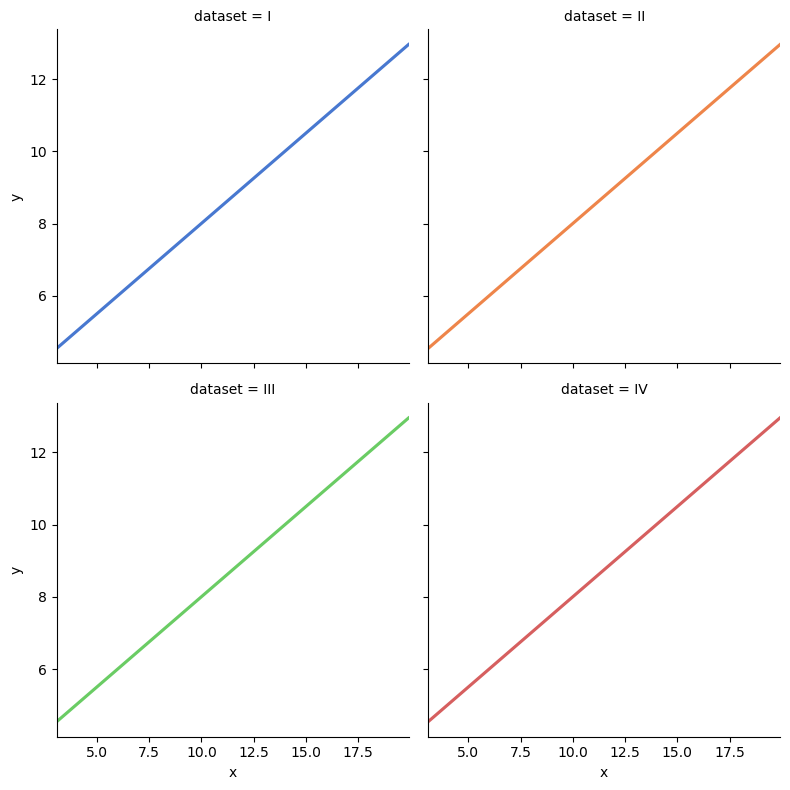

In [13]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=nothing, palette="muted", height=4, scatter=false,
           scatter_kws=Dict(:s=>50,:alpha=>1));

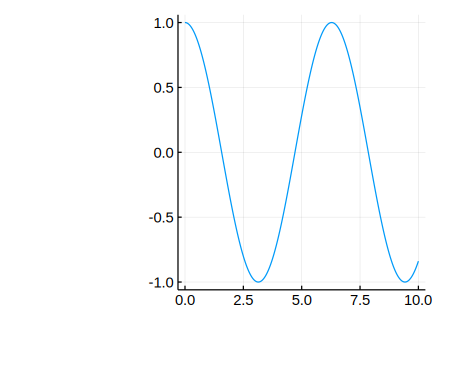

In [17]:
x = 1:0.01:10
Plots.plot(x, broadcast(cos,x),
    seriestype=:line,
    thickness_scaling=5,
    size=(1800,1500),
    legend=false
)

In [20]:
iris = sns.load_dataset("iris") # iris flowers, a classic dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Histogram

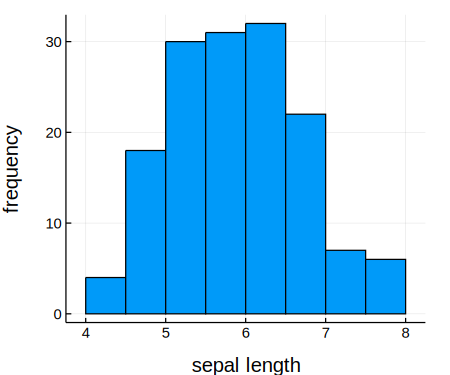

In [30]:
display(Plots.histogram(convert(Array,iris.sepal_length),
    xlabel="sepal length",
    ylabel="frequency",
    size=(1800,1500),
    legend=false,
    thickness_scaling=5
))
# sns.distplot(iris["sepal_length"]);

## Box plot

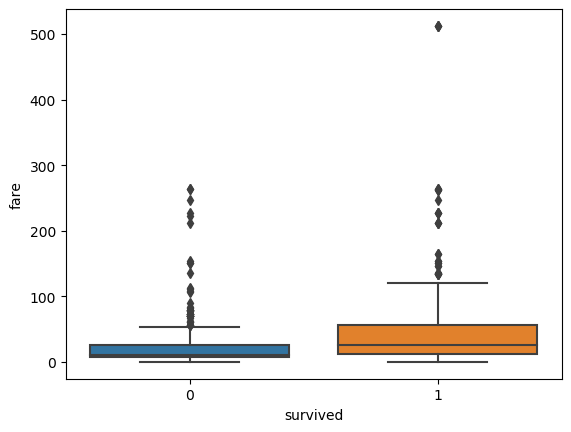

In [33]:
sns.boxplot(x="survived", y="fare", data=titanic);

## Scatterplot

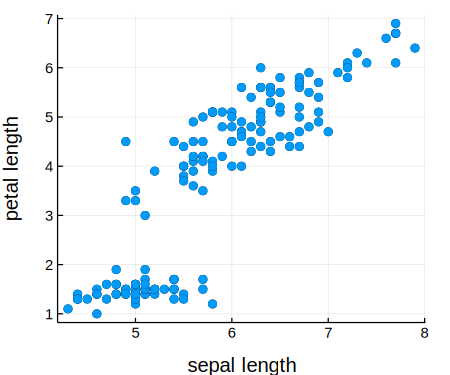

In [38]:
Plots.scatter(convert(Array,iris.sepal_length), convert(Array,iris.petal_length),
    size=(1800,1500),
    markersize=20,
    thickness_scaling=5,
    xlabel="sepal length",
    ylabel="petal length",
    legend=false
)

## Scatterplot array

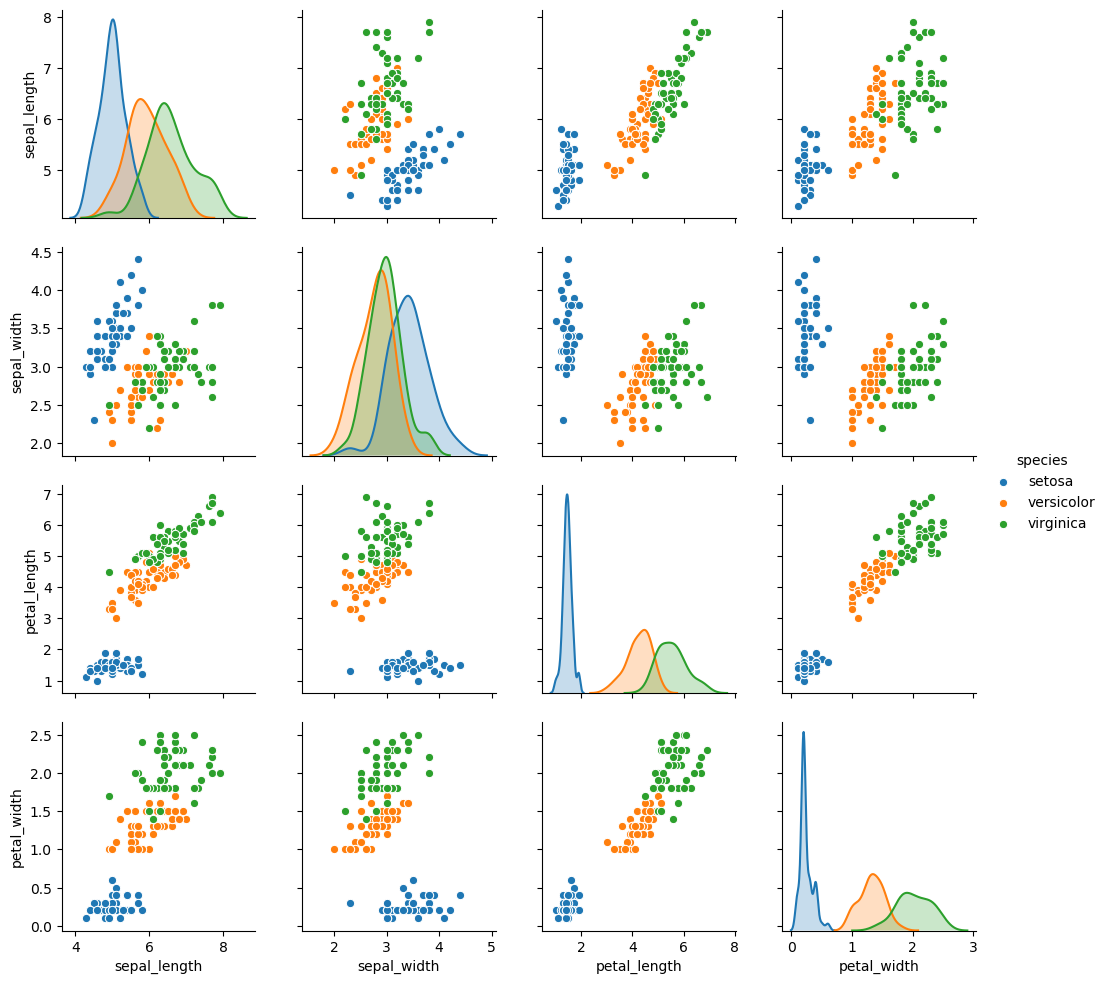

In [39]:
sns.pairplot(iris, hue="species");

## CPSC 340 meta-discussion

- This is the only CPSC 340 lecture on data cleaning and EDA.
- That is not representative of the time typically devoted to these tasks.
  - In fact, data cleaning is often the most time intensive step.
- This is a weakness of the course.
  - But not as bad if you're aware of it.

## Summary

- Typical data mining / ML steps:
  - Involves data collection, preprocessing, analysis, and evaluation.
- Object-feature representation and categorical/numerical features.
  - Transforming non-vector objects to vector representations.
- Feature transformations:
  - To address coupon collecting or simplify relationships between variables.
- Exploring data: 
  - Summary statistics and data visualization.
- Bonus slides: see Mark's slides on GitHub.